In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 120
pd.set_option('display.max_columns', None)

In [3]:
train = pd.read_csv('../data/raw/train.csv')
print(f"Jumlah Baris: {train.shape[0]}")
print(f"Jumlah Kolom: {train.shape[1]}")

Jumlah Baris: 700000
Jumlah Kolom: 26


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

In [5]:
duplicates = train.duplicated().sum()
missing = train.isnull().sum().sum()
print(f"Jumlah Data Duplikat: {duplicates}")
print(f"Jumlah Missing Values (Total): {missing}")

if missing > 0:
    print("\nDetail Missing Values per Kolom:")
    print(train.isnull().sum()[train.isnull().sum() > 0])

Jumlah Data Duplikat: 0
Jumlah Missing Values (Total): 0


In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,700000.0,349999.500000,202072.738554,0.00,174999.75,349999.50,524999.25,699999.00
age,700000.0,50.359734,11.655520,19.00,42.00,50.00,58.00,89.00
alcohol_consumption_per_week,700000.0,2.072411,1.048189,1.00,1.00,2.00,3.00,9.00
physical_activity_minutes_per_week,700000.0,80.230803,51.195071,1.00,49.00,71.00,96.00,747.00
diet_score,700000.0,5.963695,1.463336,0.10,5.00,6.00,7.00,9.90
sleep_hours_per_day,700000.0,7.002200,0.901907,3.10,6.40,7.00,7.60,9.90
screen_time_hours_per_day,700000.0,6.012733,2.022707,0.60,4.60,6.00,7.40,16.50
bmi,700000.0,25.874684,2.860705,15.10,23.90,25.90,27.80,38.40
waist_to_hip_ratio,700000.0,0.858766,0.037980,0.68,0.83,0.86,0.88,1.05
systolic_bp,700000.0,116.294193,11.010390,91.00,108.00,116.00,124.00,163.00


In [7]:
train.describe(include=['object']).T

,count,unique,top,freq
gender,700000,3,Female,363237
ethnicity,700000,5,White,386153
education_level,700000,4,Highschool,344145
income_level,700000,5,Middle,290557
smoking_status,700000,3,Never,494448
employment_status,700000,4,Employed,516170


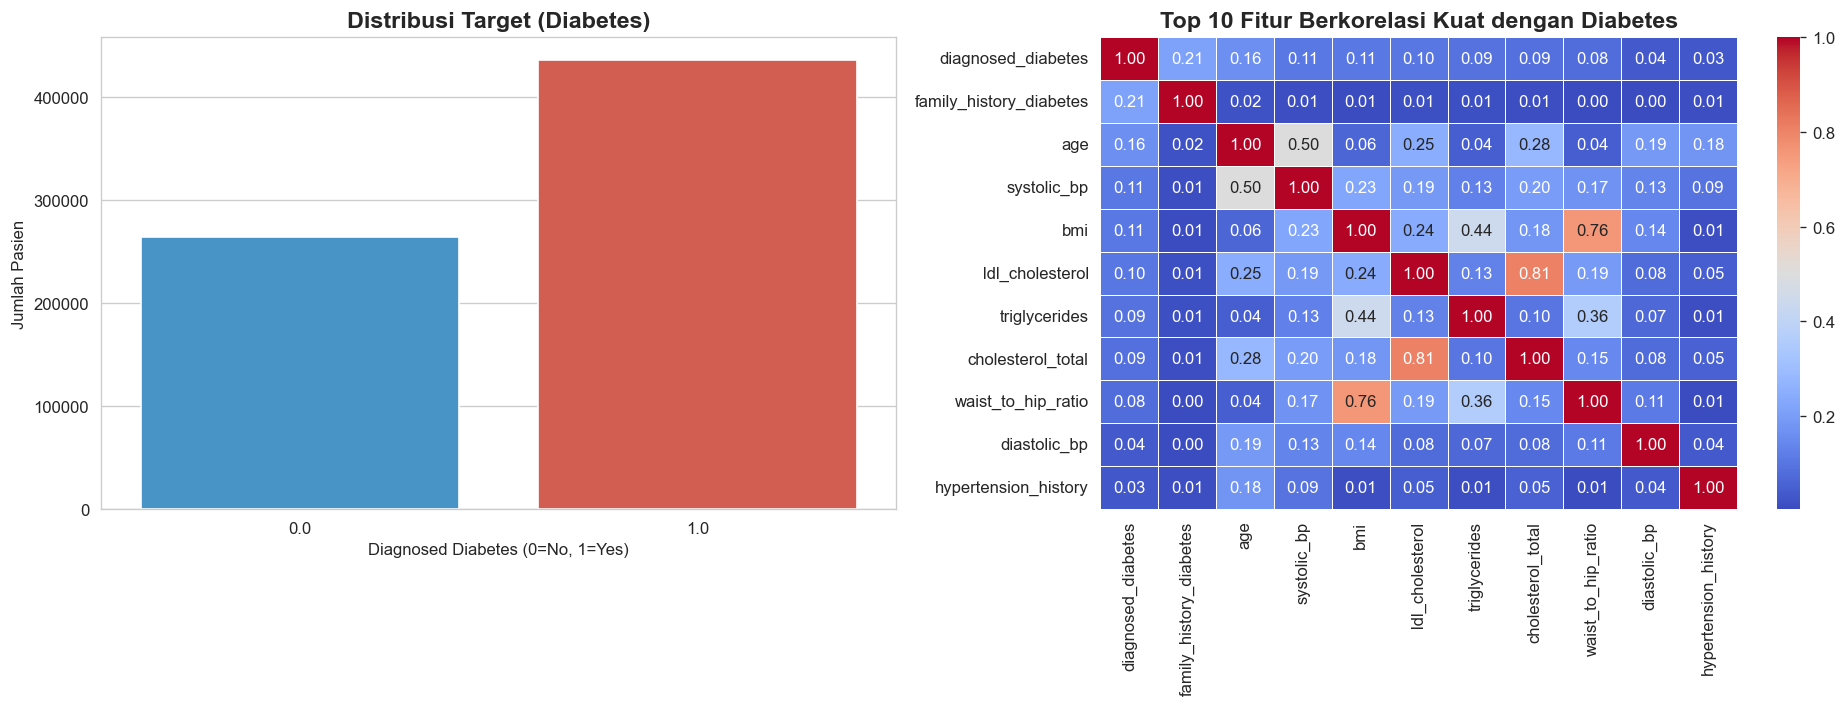

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x='diagnosed_diabetes', data=train, palette=['#3498db', '#e74c3c'], ax=axes[0])
axes[0].set_title('Distribusi Target (Diabetes)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Diagnosed Diabetes (0=No, 1=Yes)')
axes[0].set_ylabel('Jumlah Pasien')

num_data = train.select_dtypes(include=['number'])
corr_series = num_data.corr()['diagnosed_diabetes'].sort_values(ascending=False)
top_features = corr_series.index[:11].tolist() 
corr_matrix = train[top_features].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[1])
axes[1].set_title('Top 10 Fitur Berkorelasi Kuat dengan Diabetes', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/distribution_correlation.png')
plt.show()

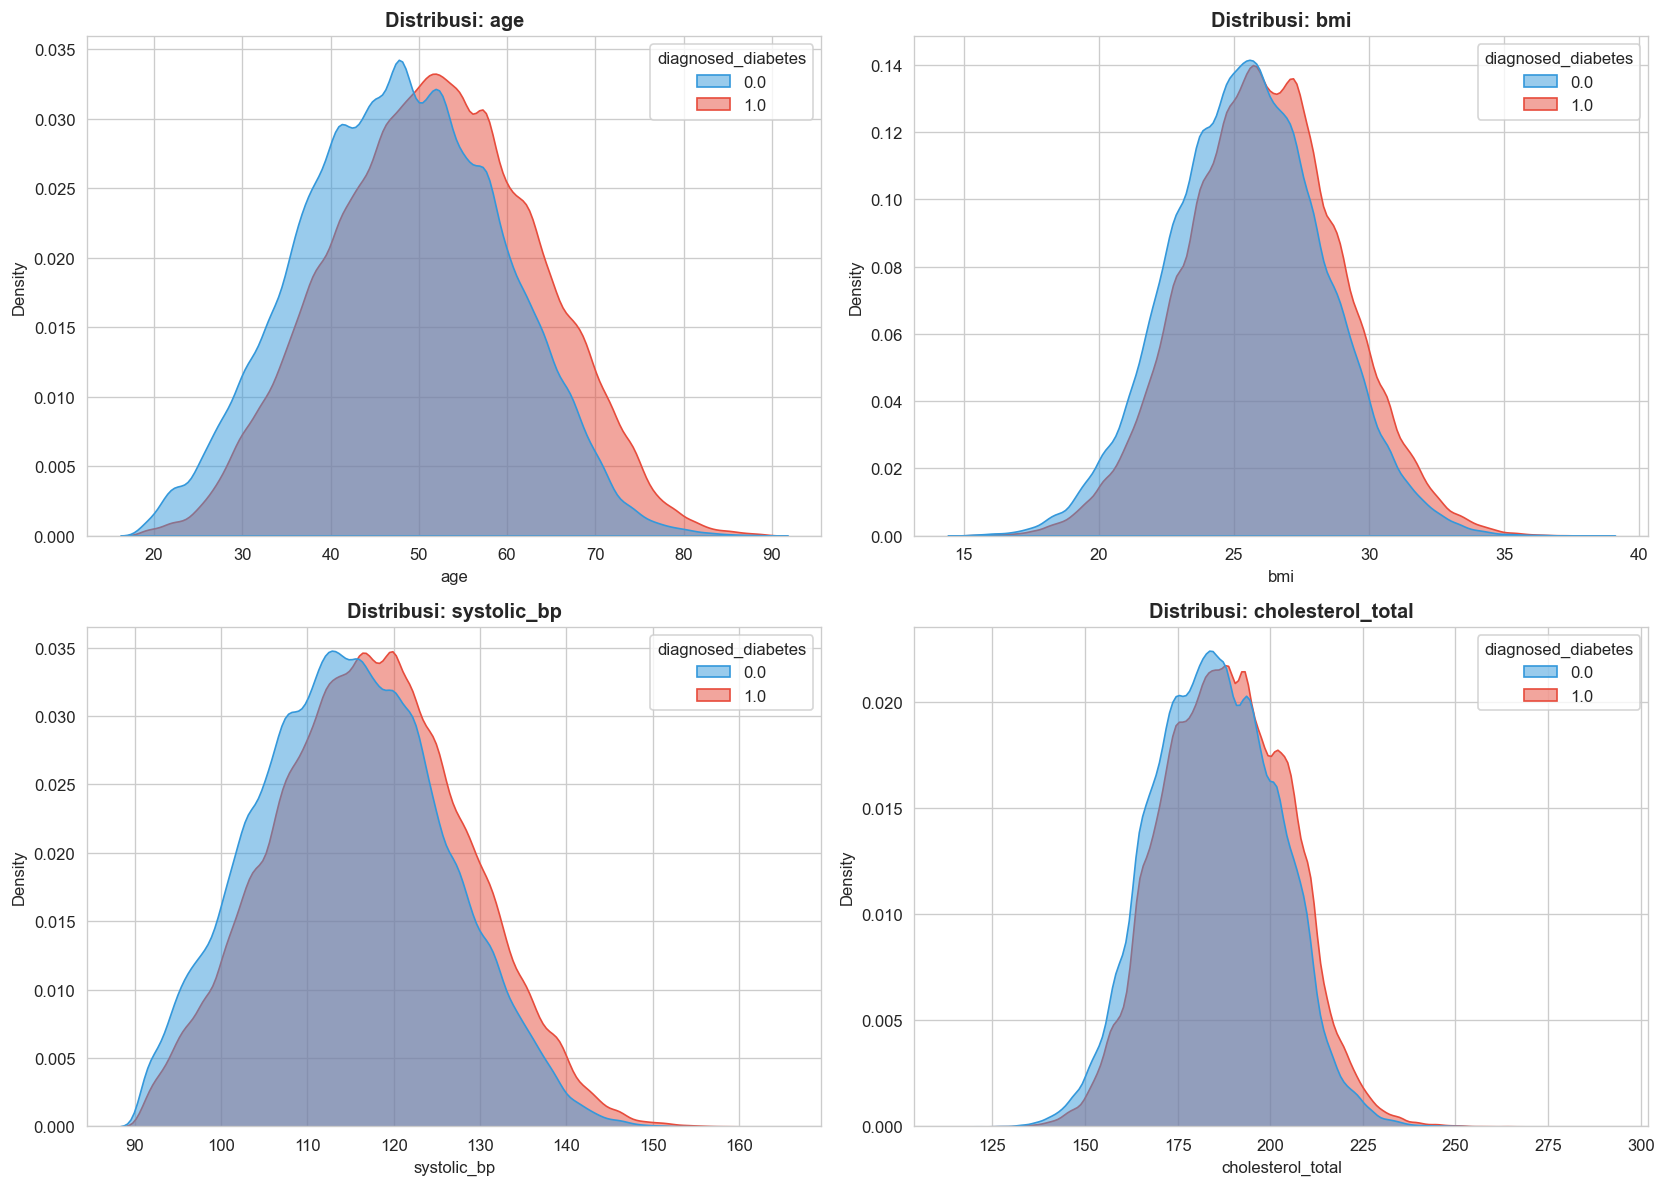

In [10]:
features_kde = ['age', 'bmi', 'systolic_bp', 'cholesterol_total']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, col in enumerate(features_kde):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(
        data=train, x=col, hue='diagnosed_diabetes', 
        fill=True, common_norm=False, palette=['#3498db', '#e74c3c'], ax=ax, alpha=0.5
    )
    ax.set_title(f'Distribusi: {col}', fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/distribusi_kde.png')
plt.show()

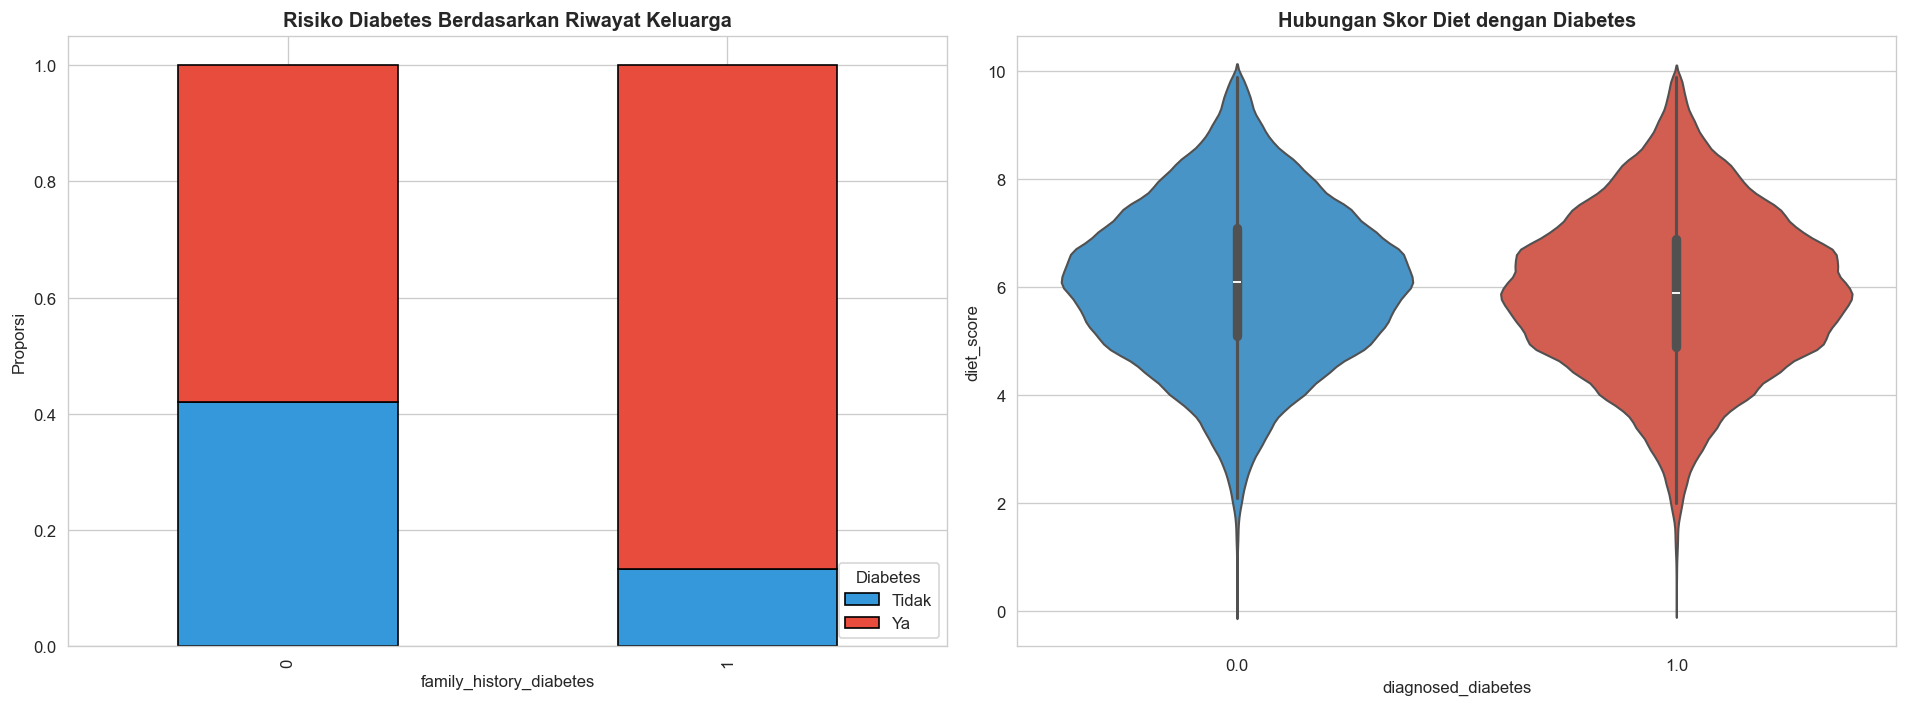

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

props = train.groupby('family_history_diabetes')['diagnosed_diabetes'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked=True, color=['#3498db', '#e74c3c'], ax=axes[0], edgecolor='black')
axes[0].set_title('Risiko Diabetes Berdasarkan Riwayat Keluarga', fontweight='bold')
axes[0].set_ylabel('Proporsi')
axes[0].legend(title='Diabetes', labels=['Tidak', 'Ya'], loc='lower right')

sns.violinplot(data=train, x='diagnosed_diabetes', y='diet_score', palette=['#3498db', '#e74c3c'], ax=axes[1])
axes[1].set_title('Hubungan Skor Diet dengan Diabetes', fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/family_history_diabetes_skor_diet.png')
plt.show()

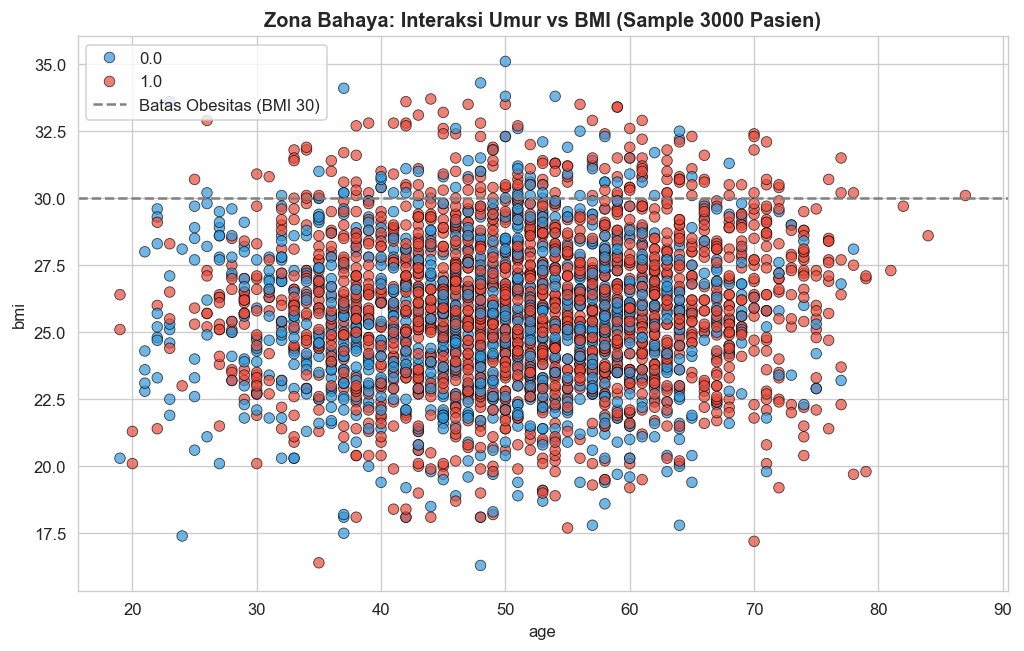

In [ ]:
sample = train.sample(3000, random_state=42) # Sample 3000 data agar ringan
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=sample, x='age', y='bmi', hue='diagnosed_diabetes', 
    palette=['#3498db', '#e74c3c'], s=40, alpha=0.7, edgecolor='k'
)
plt.title('Zona Bahaya: Interaksi Umur vs BMI (Sample 3000 Pasien)', fontweight='bold')
plt.axhline(y=30, color='gray', linestyle='--', label='Batas Obesitas (BMI 30)')
plt.legend(loc='upper left')
plt.savefig('../outputs/age_bmi.png')
plt.show()